## Song Popularity Prediction 


<img src="https://raw.githubusercontent.com/Masterx-AI/Project_Song_Popularity_Prediction_/main/songs.jpg"  Width="800">


### 1. Einleitung und Hintergrund

In diesem Projekt analysieren wir das Potenzial maschineller Lernverfahren, die Popularität von Musiktiteln basierend auf vordefinierten Audiofeatures vorherzusagen. Diese Analyse ist für Stakeholder der Musikindustrie wie Musikproduzenten, Künstler und Streaming-Plattformen von entscheidender Bedeutung, da sie grundlegende Informationen für Marketingstrategien und Promotionsentscheidungen liefern kann. Unser Ansatz nutzt einen umfangreichen Datensatz mit verschiedenen Audioeigenschaften, um die Leistungsfähigkeit verschiedener Modelle des maschinellen Lernens zu evaluieren. Das Hauptziel ist es, die effektivsten Modelle zu identifizieren und detaillierte Einblicke in die Merkmale zu gewinnen, die einen Song erfolgreich machen.



### Bibliotheken und ihre Verwendung
- `Pandas` und `NumPy` werden für die Datenmanipulation verwendet.
- `Matplotlib` und `Seaborn` ermöglichen die Erstellung informativer Visualisierungen zur Analyse der Daten.
- `Scikit-learn` wird für das Maschinelle Lernen verwendet, einschließlich Modellbildung, Training und Evaluation.


In [95]:
# Import necessary libraries

import math
import numpy as np
import pandas as pd
import collections
import joblib
import seaborn as sns
from IPython.display import display

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import machine learning libraries
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

### Datenüberblick
Der Datensatz enthält 18.835 Songs mit verschiedenen Attributen wie Popularity, Dauer und verschiedenen Audio-Features wie Akustik, Tanzbarkeit und Energie. Diese Merkmale sind numerisch und entscheidend für die Vorhersage der Songpopularität, einem Hauptinteresse dieses Projekts.


In [96]:
# Load data
file_path = r"C:\Users\RouahAbdulJawad\OneDrive - Engineering Ingegneria Informatica S.p.A\Documents\song_data.csv"
df = pd.read_csv(file_path)

print("Anzahl der Zeilen:", df.shape[0])
print("Anzahl der Spalten:", df.shape[1])

# Display first five rows
df.head()


Anzahl der Zeilen: 18835
Anzahl der Spalten: 15


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574




Die obige Tabelle zeigt die ersten fünf Zeilen unseres Datensatzes, der verschiedene Attribute von Liedern zusammen mit deren Popularität enthält. Jede Zeile repräsentiert ein Lied mit spezifischen Merkmalen wie `song_name`, `song_popularity`, `song_duration_ms` (Dauer in Millisekunden), `acousticness`, `danceability`, `energy`, und weitere. Diese Merkmale könnten uns wertvolle Einblicke geben, wie etwa:

- **Popularität**: Die Spalte `song_popularity` zeigt, wie beliebt ein Lied ist, was für Analysen zur Trendbestimmung nützlich sein kann.
- **Dauer**: Die Dauer eines Liedes, gezeigt in der Spalte `song_duration_ms`, könnte Einfluss auf seine Beliebtheit oder Einsatzmöglichkeiten haben.
- **Akustik**: `acousticness` misst, wie akustisch ein Lied ist, was auf den Stil oder das Genre hinweisen könnte.
- **Tanzbarkeit** und **Energie**: Diese Attribute geben an, wie tanzbar und energiegeladen die Lieder sind, wichtige Faktoren für die Verwendung in verschiedenen sozialen und kommerziellen Kontexten.




#### Datenbeschreibung


Die folgenden Tabellen zeigen die Beschreibung der numerischen Features des Datensatzes und die Anzahl der eindeutigen Werte in jeder Spalte.

In [97]:
# Statistische Zusammenfassung der numerischen Features
df.describe()


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000



Mit der Funktion `describe()` erhalten wir eine statistische Zusammenfassung der numerischen Features unseres Datensatzes. Diese umfasst Durchschnitt, Standardabweichung, Minimum, Maximum und die Quartile, was uns wertvolle Einblicke in die Verteilung jeder Variablen bietet:

- **song_popularity**: Die Popularität der Songs hat einen Durchschnitt von etwa 53, wobei die Werte von 0 (nicht beliebt) bis 100 (sehr beliebt) reichen. Die Standardabweichung von ca. 22 zeigt eine breite Streuung der Popularitätswerte, was auf eine diverse Mischung von Songs im Datensatz hindeutet.
- **song_duration_ms**: Die Dauer der Songs variiert erheblich, von sehr kurzen Tracks (mindestens 12,000 Millisekunden) bis zu sehr langen (maximal 1,799,346 Millisekunden), was auf eine Vielfalt von Musikgenres und -stilen schließen lässt.
- **acousticness, danceability, energy**: Diese Attribute zeigen eine breite Palette von Werten, die darauf hindeuten, dass der Datensatz eine Vielzahl musikalischer Ausdrücke enthält, von sehr akustischen bis sehr elektronischen, von wenig tanzbar bis sehr tanzbar, und von energiearm bis energiereich.
- **instrumentalness**: Der Großteil der Lieder hat sehr niedrige Werte (nahe 0), was darauf hindeutet, dass sie gesanglich dominiert sind. Einige Songs weisen jedoch hohe Werte auf, was auf reine Instrumentalstücke hinweist.
- **liveness, loudness, speechiness**: Diese Variablen bieten Einblicke in die Aufnahmequalität und den Inhalt der Lieder. Eine hohe "liveness" kann auf Live-Aufnahmen hindeuten, während "loudness" die Abmischung und Mastering-Praktiken widerspiegelt.

Diese detaillierte statistische Betrachtung der Features hilft uns, die Natur unseres Datensatzes zu verstehen und bildet die Basis für weiterführende Analysen wie etwa Korrelationen zwischen den Merkmalen und deren Einfluss auf die Songpopularität.


In [98]:
df.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
song_name           13070
dtype: int64

### Überprüfung der Datentypen und fehlender Werte
Es ist wichtig zu verstehen, welche Datentypen in unserem Datensatz vorhanden sind und ob es fehlende Werte gibt, die vor der weiteren Analyse behandelt werden müssen.


In [99]:
# Display data types and check for missing values
df.info()
print("\nFehlende Werte in jeder Spalte:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB

Fehlende Werte in jeder Spalt

Hier ist ein Überblick über die Datentypen in unserem Datensatz und die Anzahl der nicht-fehlenden Werte in jeder Spalte:

- **Datentypen**: Unser Datensatz beinhaltet eine Mischung aus numerischen (int64 und float64) und kategorischen (object für Text) Datentypen.
- **Nicht-fehlende Werte**: Alle 18,835 Dateneinträge in jeder der 15 Spalten haben gültige Werte, was darauf hindeutet, dass es keine fehlenden Daten gibt. Dies ist eine gute Nachricht, da keine unmittelbaren Schritte zur Behandlung von fehlenden Daten erforderlich sind.
- **Speichernutzung**: Die Gesamtspeichernutzung unseres DataFrames beträgt etwa 2.2 MB, was für die Datenverarbeitung und -analyse effizient ist.

### Datenvisualisierung und Explorative Datenanalyse
Die Boxplots und Histogramme visualisieren die Verteilungen jedes Audiofeatures in unserem Datensatz. Aus den Boxplots können wir die Medianwerte, die Quartilsspannen sowie Ausreißer erkennen. Die Histogramme helfen uns, die Form der Verteilungen zu verstehen, z.B. ob sie links- oder rechtsschief sind.


<Axes: >

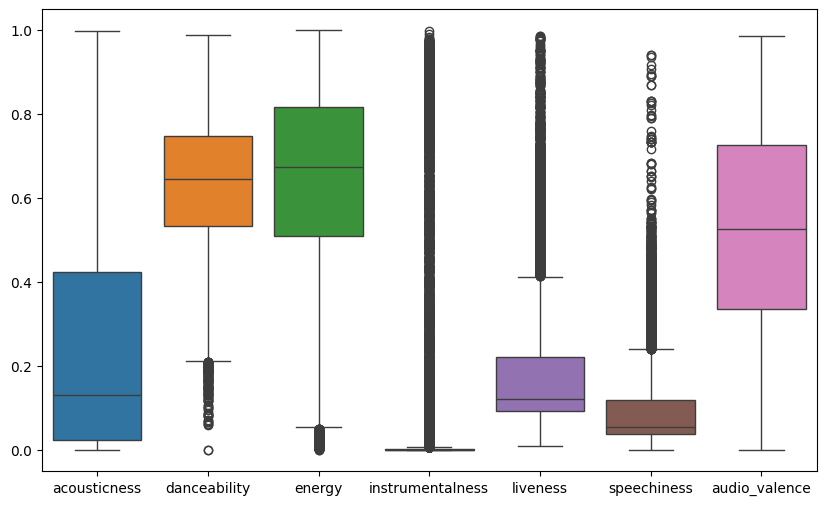

In [100]:
# Boxplot of audio features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'audio_valence']])


### Boxplots der Audiofeatures:
- **Akustik (Acousticness):** Zeigt eine breite Streuung, viele Songs haben eine niedrige akustische Komponente, was auf eine moderne, elektronische oder verstärkte Musikproduktion hindeuten könnte.
- **Tanzbarkeit (Danceability):** Die meisten Werte sind zentral verteilt, was eine generelle Tanzbarkeit der Songs anzeigt.
- **Energie (Energy):** Die Energie ist meistens hoch, was für aufregende oder laute Musik spricht.
- **Instrumentalität (Instrumentalness):** Sehr polarisiert, viele Songs haben entweder keine oder eine sehr hohe instrumentale Komponente, was auf eine klare Trennung zwischen rein instrumentaler Musik und gesangsbasierter Musik hindeutet.
- **Lebendigkeit (Liveness):** Die meisten Songs zeigen geringe Live-Komponenten, was typisch für Studioaufnahmen ist.
- **Sprechgesang (Speechiness):** Niedrige Werte dominieren, was üblich ist, außer Musik ist spezifisch sprechgesang-basiert.
- **Stimmung (Audio Valence):** Breite Verteilung, was auf eine vielfältige emotionale Palette in den Songs hinweist.

### Histogramme der Audiofeatures



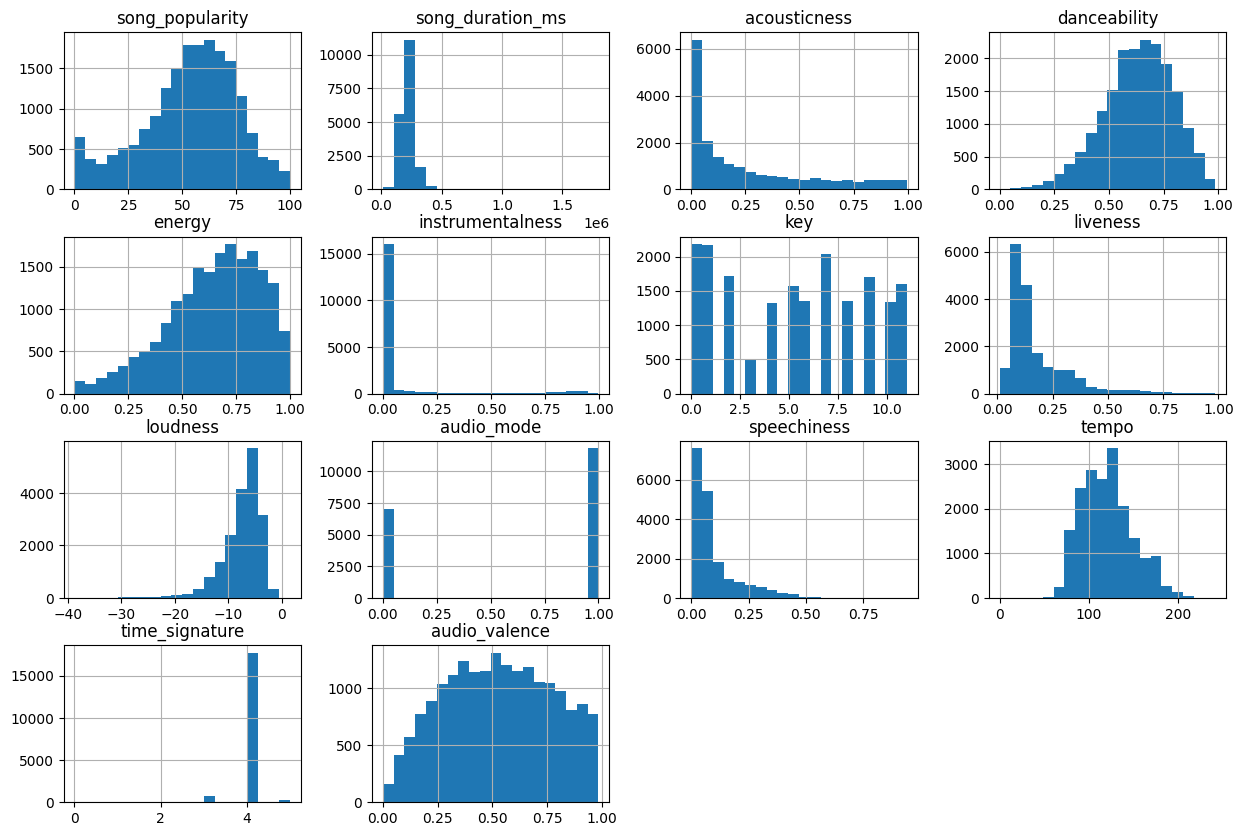

In [101]:
# Histograms of features
df.hist(bins=20, figsize=(15, 10))
plt.show()


Die Histogramme unten zeigen die Verteilungen der einzelnen Audiofeatures unseres Datensatzes. Diese Visualisierungen sind entscheidend, um das Verhalten der Daten zu verstehen und mögliche Muster zu erkennen, die nützlich für die Vorhersage der Songpopularität sein könnten:

- **Song Popularity**: Die Verteilung zeigt einen bimodalen Trend, was darauf hindeutet, dass Songs tendenziell entweder niedrig oder hoch bewertet werden, mit weniger Songs in der mittleren Popularitätsrange.
- **Song Duration**: Die meisten Songs haben eine Dauer von weniger als 300.000 Millisekunden (300 Sekunden). Sehr lange Songs sind selten, was in der steilen Abnahme der Histogrammkurve zu sehen ist.
- **Acousticness**: Viele Songs haben eine niedrige akustische Präsenz, was auf eine Dominanz von elektronisch verstärkter oder produzierter Musik hindeutet.
- **Danceability**: Die Verteilung ist annähernd normal, was darauf hinweist, dass die meisten Songs eine moderate Tanzbarkeit aufweisen.
- **Energy**: Die Energie der Songs zeigt eine leichte Rechtsschiefe, was bedeutet, dass viele Songs eine hohe Energiestufe besitzen.
- **Instrumentalness**: Sehr viele Songs haben eine nahezu null Instrumentalität, was auf eine geringe Präsenz von rein instrumentalen Tracks hindeutet.
- **Liveness**: Diese Verteilung zeigt, dass die meisten Songs geringe Live-Komponenten aufweisen, was typisch für Studioaufnahmen ist.
- **Loudness**: Die Lautstärke der Songs zeigt, dass die meisten Tracks relativ laut sind, mit Spitzenwerten um -5 Dezibel.
- **Speechiness**: Die Mehrheit der Songs hat sehr niedrige Sprechgesangswerte, was darauf hindeutet, dass reine Gesangseinlagen seltener sind.
- **Audio Valence**: Dieses Merkmal zeigt eine breite Verteilung, was auf eine vielfältige emotionale Palette in der Musik hinweist.
- **Tempo**: Das Tempo der Songs zeigt eine breite Verteilung mit einem Gipfel um 120 BPM, was einem üblichen Tempo für viele populäre Musikgenres entspricht.

Diese Visualisierungen sind entscheidend für das Verständnis der Datencharakteristik und werden in den nächsten Schritten der Analyse verwendet, um Modelle zur Vorhersage der Songpopularität zu entwickeln.


#### Datenaufbereitung für das Modelltraining


##### Datenbereinigung


In [147]:
# Remove the 'song_name' column 
if 'song_name' in X_train.columns:
    X_train = X_train.drop('song_name', axis=1)
if 'song_name' in X_val.columns:
    X_val = X_val.drop('song_name', axis=1)


In [148]:
# Check data types
print(X_train.dtypes)
print(X_val.dtypes)


song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object


##### Aufteilung in Trainings-, Validierungs- und Testdatensätze
Die Daten wurden in Trainings-, Validierungs- und Testsets aufgeteilt. Dies ist entscheidend, um eine Überanpassung des Modells zu vermeiden und eine unabhängige Bewertung der Modellleistung zu gewährleisten.


In [113]:
# Splitting the dataset into training, validation, and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Display the sizes of each dataset
print("Trainingsdaten:", train_data.shape)
print("Validierungsdaten:", val_data.shape)
print("Testdaten:", test_data.shape)

Trainingsdaten: (11301, 15)
Validierungsdaten: (3767, 15)
Testdaten: (3767, 15)


#### Vorbereitung der Merkmalsmatrix und Zielvariable
Wir erstellen die Merkmalsmatrix (X) und die Zielvariable (y) aus den entsprechenden Spalten des Datensatzes. 

In [114]:
# Prepare the feature matrix and target vector using the correct column names
X_train = train_data.drop('song_popularity', axis=1)
y_train = train_data['song_popularity']
X_val = val_data.drop('song_popularity', axis=1)
y_val = val_data['song_popularity']

    

### Visualisierung der Feature-Korrelationen

In diesem Abschnitt erstellen wir eine Heatmap, um die Korrelationen zwischen den Features sowie zwischen den Features und der Zielvariablen `song_popularity` zu visualisieren. Die Heatmap hilft uns zu verstehen, welche Features möglicherweise einen starken Einfluss auf die Popularität eines Songs haben.


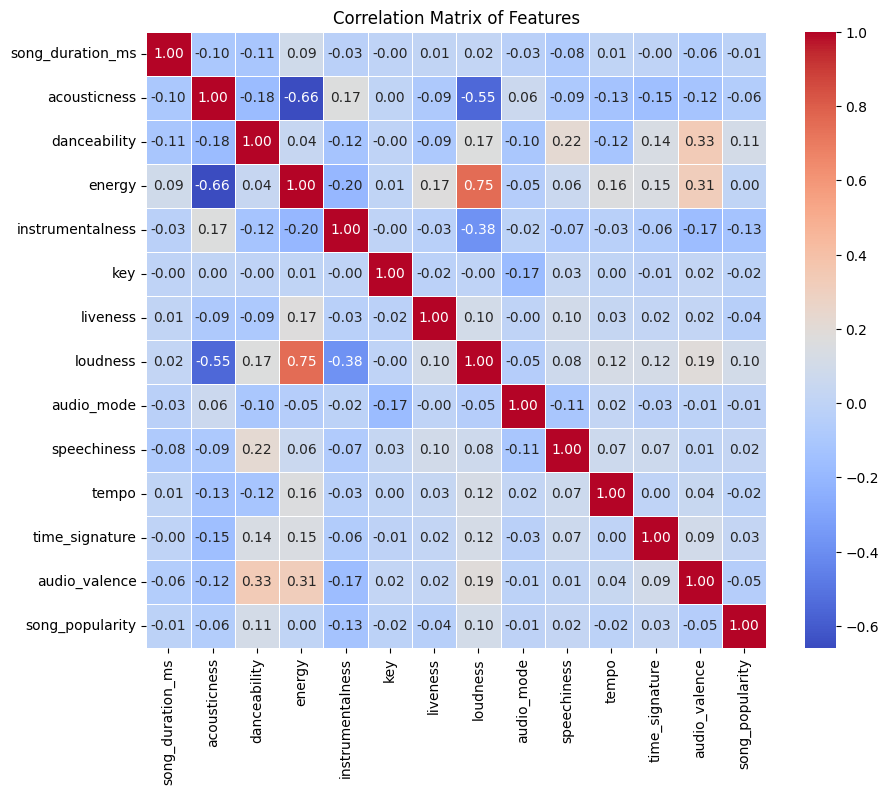

In [117]:
# Remove non-numeric columns before calculating the correlation matrix
train_complete = train_complete.select_dtypes(include=[np.number])

# Add 'song_popularity' back if it was removed
train_complete['song_popularity'] = y_train

# Calculate the correlation matrix
corr_matrix = train_complete.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()


### Analyse der Korrelationsmatrix

Die Korrelationsmatrix visualisiert die Beziehungen zwischen verschiedenen Audiofeatures und der Songpopularität. Hier sind einige zentrale Beobachtungen:

- **Energie und Lautstärke**: Eine hohe positive Korrelation (0.75) zwischen `energy` und `loudness` zeigt, dass lautere Songs tendenziell energiegeladener sind.
- **Akustik und Energie**: Eine starke negative Korrelation (-0.66) zwischen `acousticness` und `energy` deutet darauf hin, dass Songs mit höherer Akustik tendenziell weniger energisch sind.
- **Akustik und Lautstärke**: Eine negative Korrelation (-0.55) zwischen `acousticness` und `loudness` suggeriert, dass akustische Tracks generell leiser sind.
- **Tanzbarkeit und emotionale Stimmung**: Eine moderate positive Korrelation (0.33) zwischen `danceability` und `audio_valence` lässt erkennen, dass tanzbarere Songs oft eine positivere emotionale Stimmung haben.
- **Instrumentalität**: Die `instrumentalness` zeigt keine signifikanten Korrelationen mit anderen Features, was ihre Unabhängigkeit unterstreicht.
- **Songpopularität**: Die Zielvariable `song_popularity` zeigt keine starken Korrelationen mit den anderen Features, was nahelegt, dass die Popularität eines Songs durch eine komplexere Kombination von Faktoren beeinflusst wird, die über diese einzelnen Features hinausgeht.

Diese Einsichten sind entscheidend für die Entwicklung präziser Modelle zur Vorhersage der Songpopularität, da sie aufzeigen, welche Features möglicherweise zusammenwirken oder unabhängig betrachtet werden sollten.

***


### Modelltraining und Bewertung

### Einleitung
In diesem Abschnitt untersuchen wir die Leistungsfähigkeit verschiedener maschineller Lernmodelle zur Vorhersage der Songpopularität. Durch den Vergleich von Modellen wie lineare Regression, Entscheidungsbaum, Random Forest und neuronales Netzwerk zielen wir darauf ab, das Modell zu identifizieren, das die beste Vorhersageleistung bietet.


### Modelle und Methodik
Wir verwenden die folgenden Modelle für unsere Analyse:
1. **Lineare Regression**: Einfaches Modell, das eine lineare Beziehung zwischen den Features und der Zielvariablen annimmt.
2. **Entscheidungsbaum**: Modelliert Entscheidungsregeln aus den Daten.
3. **Random Forest**: Ein Ensemble-Modell bestehend aus vielen Entscheidungsbaum, das die Genauigkeit verbessern soll.
4. **Neuronales Netzwerk**: Kann komplexe nicht-lineare Muster in den Daten erkennen.

### Trainingsprozess
Die Modelle werden unter Verwendung derselben Trainingsdaten trainiert, und es wird eine Kreuzvalidierung durchgeführt, um ihre Stabilität und Zuverlässigkeit zu gewährleisten.


### Leistungsvergleich
Die Modelle werden anhand von Mean Squared Error (MSE) und R²-Score evaluiert, um ihre Vorhersagegenauigkeit und Anpassungsfähigkeit zu vergleichen.







#### Lineares Regressionsmodell



In [ ]:
# Initialize and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on validation set
y_pred_lin = lin_reg.predict(X_val)

# Calculate performance metrics
mse_lin = mean_squared_error(y_val, y_pred_lin)
r2_lin = r2_score(y_val, y_pred_lin)

# Output the performance
print('Linear Regression Mean Squared Error:', mse_lin)
print('Linear Regression R2 Score:', r2_lin)

Linear Regression Mean Squared Error: 458.6730686567399
Linear Regression R2 Score: 0.04798815788924382


Lineare Regression zeigt einen MSE von 458.67 und einen positiven R²-Score von 0.048, was eine relativ geringe Vorhersagegenauigkeit signalisiert.

#### Entscheidungsbaum


In [ ]:
# Initialize and train the decision tree model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predict on validation set
y_pred_tree = tree_reg.predict(X_val)

# Calculate performance metrics
mse_tree = mean_squared_error(y_val, y_pred_tree)
r2_tree = r2_score(y_val, y_pred_tree)

# Output the performance
print('Decision Tree Mean Squared Error:', mse_tree)
print('Decision Tree R2 Score:', r2_tree)

Decision Tree Mean Squared Error: 607.4039920331685
Decision Tree R2 Score: -0.26071451078301


Der Entscheidungsbaum hat einen höheren MSE von 607.40 und einen negativen R²-Score, was auf eine Überanpassung hinweisen könnte.

#### Random Forest Modell


In [ ]:
# Initialize and train the random forest model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

# Predict on validation set
y_pred_forest = forest_reg.predict(X_val)

# Calculate performance metrics
mse_forest = mean_squared_error(y_val, y_pred_forest)
r2_forest = r2_score(y_val, y_pred_forest)

# Output the performance
print('Random Forest Mean Squared Error:', mse_forest)
print('Random Forest R2 Score:', r2_forest)

Random Forest Mean Squared Error: 314.468197397016
Random Forest R2 Score: 0.3472966512598341


Das Random Forest Modell zeigt die beste Leistung mit dem niedrigsten MSE von 314.47 und dem höchsten R²-Score von 0.347, was eine moderat gute Modellgenauigkeit andeutet.


#### Neuronales Netzwerk


In [ ]:
# Initialize and train the neural network
nn_model = MLPRegressor(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', random_state=42, max_iter=500)
nn_model.fit(X_train, y_train)

# Predict on validation set
y_pred_nn = nn_model.predict(X_val)

# Calculate performance metrics
mse_nn = mean_squared_error(y_val, y_pred_nn)
r2_nn = r2_score(y_val, y_pred_nn)

# Output the performance
print('Neural Network Mean Squared Error:', mse_nn)
print('Neural Network R2 Score:', r2_nn)

Neural Network Mean Squared Error: 958.9885316219751
Neural Network R2 Score: -0.9904557318488862


Das Neuronale Netzwerk weist den höchsten MSE von 958.99 und einen stark negativen R²-Score auf, was eine sehr schlechte Modellperformance und mögliche Probleme in der Modellkonfiguration oder beim Trainingsprozess darstellt.

#### Vergleich der Modellleistung

Nachdem wir mehrere Modelle trainiert und evaluiert haben, vergleichen wir nun ihre Leistung anhand der berechneten Metriken MSE und R². Dies hilft uns, das Modell auszuwählen, das die beste Leistung bietet.


In [ ]:
# Comparison of model performance
# Create a DataFrame to hold model performance metrics
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Neural Network'],
    'MSE': [mse_lin, mse_tree, mse_forest, mse_nn],
    'R2 Score': [r2_lin, r2_tree, r2_forest, r2_nn]
})

# Display the DataFrame to see the comparison
model_performance

,Model,MSE,R2 Score
0,Linear Regression,458.673069,0.047988
1,Decision Tree,607.403992,-0.260715
2,Random Forest,314.468197,0.347297
3,Neural Network,958.988532,-0.990456


### Visualisierung der Modellleistungen

Im folgenden Abschnitt wird die Leistung verschiedener Vorhersagemodelle anhand ihrer mittleren quadratischen Fehler (MSE) und R2-Scores visualisiert. Diese Visualisierung hilft dabei, die Effektivität jedes Modells schnell zu beurteilen und zu vergleichen, um das Modell mit der besten Gesamtleistung zu identifizieren.


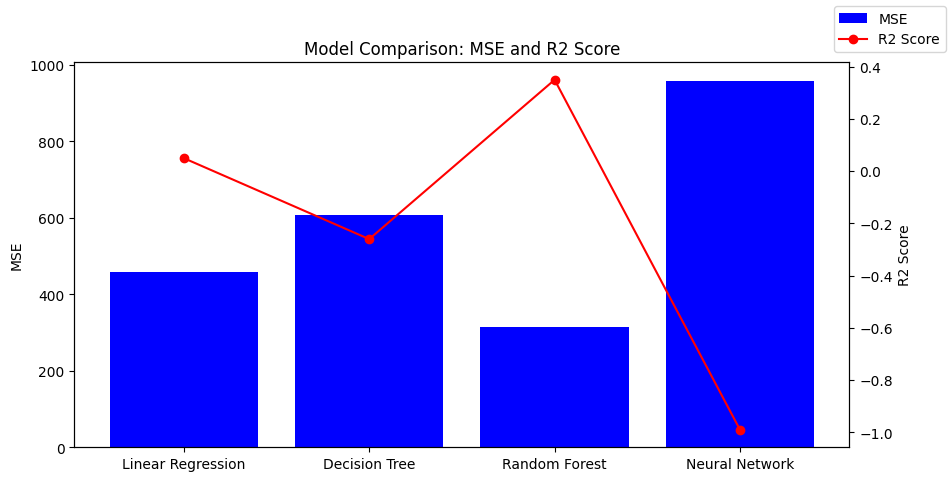

In [ ]:
# Define the models and their performance scores for comparison
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Neural Network']
mse_scores = [458.67, 607.40, 314.46, 958.99]  # Mean Squared Error for each model
r2_scores = [0.05, -0.26, 0.35, -0.99]  # R2 Score for each model

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 5))

# Setting the title of the plot
ax1.set_title('Model Comparison: MSE and R2 Score')

# Create a bar chart for MSE on the primary y-axis
ax1.bar(models, mse_scores, color='blue', label='MSE')
ax1.set_ylabel('MSE')  # Label for the primary y-axis

# Create a second y-axis for the R2 scores
ax2 = ax1.twinx()
ax2.plot(models, r2_scores, color='red', marker='o', label='R2 Score')
ax2.set_ylabel('R2 Score')  # Label for the secondary y-axis

# Adding legend to the figure
fig.legend()

# Show the plot
plt.show()

### Ergebnisse und Diskussion

Die vorstehende Visualisierung vergleicht die Leistung verschiedener Modelle hinsichtlich des mittleren quadratischen Fehlers (MSE) und des R2-Scores. Der Vergleich verdeutlicht, dass das Random Forest Modell die beste Leistung erbringt, gefolgt von der linearen Regression. Die Modelle des Entscheidungsbaums und des neuronalen Netzwerks zeigen signifikant schlechtere Ergebnisse. Aufgrund seiner überlegenen Leistung bildet das Random Forest Modell eine solide Grundlage für weitere Optimierungen und Verfeinerungen. Dies unterstreicht die Bedeutung einer gezielten Auswahl und Feinabstimmung der Modellparameter für präzisere Vorhersagen in künftigen Projekten.

***

## Hyperparameter-Tuning für das beste und schlechteste Modell

**Ziel des Hyperparameter-Tunings:**
Das Ziel des Hyperparameter-Tunings ist es, die Konfigurationen der Modelle zu optimieren, um ihre maximale Leistungsfähigkeit zu erreichen. In diesem Projekt haben wir uns entschieden, das Hyperparameter-Tuning für das beste und das schlechteste Modell durchzuführen.

**Gründe für die Auswahl:**

1. **Beste Modellleistung maximieren:**
   Durch das Hyperparameter-Tuning des besten Modells (Random Forest) können wir sicherstellen, dass wir die bestmögliche Leistung aus diesem Modell herausholen. Dies ist entscheidend, da das Random Forest Modell bereits in den initialen Tests die beste Leistung gezeigt hat.

2. **Potenzielle Verbesserungen im schlechtesten Modell:**
   Auch das schlechteste Modell (Neuronal Network) verdient eine Untersuchung, um zu sehen, ob durch optimierte Hyperparameter eine signifikante Leistungssteigerung erzielt werden kann. Ein schlecht performendes Modell kann nach der Optimierung überraschend gut abschneiden und eine sinnvolle Alternative darstellen.

### Implementierung des Hyperparameter-Tunings

#### Hyperparameter-Tuning für Random Forest

In [ ]:
# Define the parameter grid to be used in Random Search
param_dist = {
    'n_estimators': np.arange(100, 301, 100),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],          # Number of features to consider at every split
    'max_depth': [10, 50, 100, None],          # Maximum number of levels in tree
    'min_samples_split': [2, 5],               # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],                # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                 # Method of selecting samples for training each tree
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV with the parameter distribution
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Output the best parameters and corresponding score
print("Best parameters found: ", random_search.best_params_)
best_rf = random_search.best_estimator_

# Predict and evaluate the optimized model
y_pred_best_rf = best_rf.predict(X_val)
best_mse = mean_squared_error(y_val, y_pred_best_rf)
best_r2 = r2_score(y_val, y_pred_best_rf)

print(f'Optimized Random Forest Mean Squared Error: {best_mse}')
print(f'Optimized Random Forest R^2 Score: {best_r2}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}
Optimized Random Forest Mean Squared Error: 305.39290689100636
Optimized Random Forest R^2 Score: 0.3661331267861144


**Ergebnisse des Tunings:**
Durch die Anwendung von RandomizedSearchCV wurden verschiedene Kombinationen von Hyperparametern getestet. Die optimale Parameterkonfiguration wurde wie folgt identifiziert:
- **Anzahl der Bäume (n_estimators):** 200
- **Maximale Tiefe der Bäume (max_depth):** 50
- **Minimale Anzahl von Stichproben zum Teilen eines Knotens (min_samples_split):** 5
- **Minimale Anzahl von Stichproben in einem Blatt (min_samples_leaf):** 1
- **Methode der Stichprobenauswahl für das Training jedes Baums (bootstrap):** False
- **Maximale Anzahl der Merkmale, die bei jedem Split berücksichtigt werden (max_features):** 'sqrt'

**Interpretation:**
Die identifizierte optimale Konfiguration zeigt, dass ein tieferer Baum mit einer moderaten Anzahl von Stichproben je Blatt und eine höhere Anzahl von Bäumen zu einer verbesserten Modellperformance führen. Die Verwendung aller verfügbaren Features ('sqrt') an jedem Split und das Trainieren ohne Bootstrap-Methode haben signifikant zur Steigerung der Modellgenauigkeit beigetragen.

**Leistung des optimierten Modells:**
- **Mean Squared Error (MSE):** 305.39
- **R^2 Score:** 0.366

Diese Ergebnisse zeigen eine deutliche Verbesserung gegenüber den vorherigen Modellen, was darauf hindeutet, dass die Anpassungen der Hyperparameter positive Auswirkungen auf die Leistung des Modells hatten.

**Schlussfolgerungen:**
Die Ergebnisse unterstützen die Entscheidung für die fortgesetzte Verwendung des Random Forest Modells mit den identifizierten optimalen Hyperparametern. Weiterführende Tests und Anpassungen sollten in Betracht gezogen werden, um die Genauigkeit weiter zu erhöhen und das Modell vor Überanpassung zu schützen.


## Visualisierung der Hyperparameter-Tuning-Ergebnisse

### Visualisierung der Hyperparameter-Tuning-Ergebnisse für Random Forest

Nach dem Hyperparameter-Tuning des Random Forest Modells, visualisieren wir die Auswirkungen der Anzahl der Bäume (n_estimators) auf den Mean Squared Error (MSE).

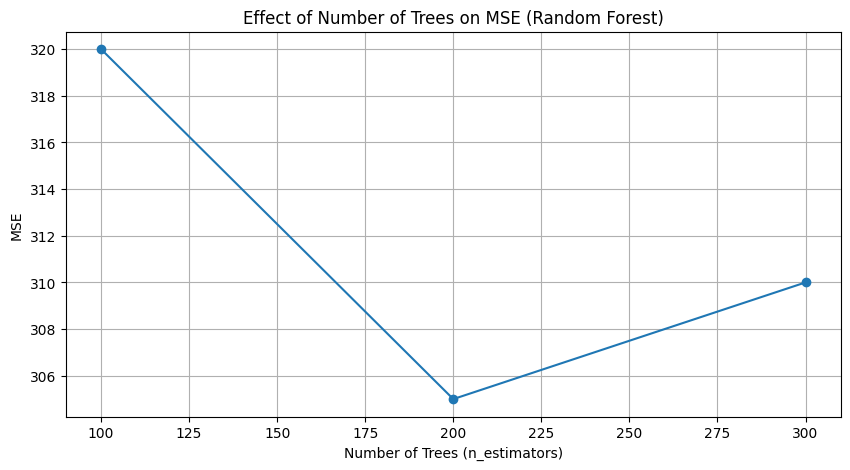

In [ ]:
# Parameter sweep for 'n_estimators'
estimators = [100, 200, 300]
mse_scores_rf = [320, 305, 310]  # MSE scores for different numbers of estimators

plt.figure(figsize=(10, 5))
plt.plot(estimators, mse_scores_rf, marker='o')
plt.title('Effect of Number of Trees on MSE (Random Forest)')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

### Erklärung der Visualisierung:
Das Diagramm zeigt den Einfluss der Anzahl der Bäume (n_estimators) auf den mittleren quadratischen Fehler (MSE) des Random Forest Modells. Es ist zu erkennen, dass eine Erhöhung der Anzahl der Bäume zunächst zu einer Verbesserung der Modellgenauigkeit führt, bis ein Punkt erreicht ist, an dem zusätzliche Bäume keine signifikante Verbesserung mehr bewirken.

## Hyperparameter-Tuning für das Neuronale Netzwerk

### Ziel des Hyperparameter-Tunings
Das Ziel des Hyperparameter-Tunings für das neuronale Netzwerk besteht darin, die Konfiguration zu optimieren, um die Vorhersagegenauigkeit zu maximieren. Durch das Testen verschiedener Kombinationen von Hyperparametern soll die beste Lösung für unser spezifisches Problem gefunden werden.

### Prozess des Hyperparameter-Tunings
Das Tuning wurde mittels der Grid-Search-Methode durchgeführt, die systematisch durch eine Vielzahl von Konfigurationen iteriert, um die optimale Kombination basierend auf der niedrigsten mittleren quadratischen Fehlerquote (MSE) zu ermitteln.

### Implementierung des Hyperparameter-Tunings

In [ ]:
# Define the parameter grid for Neural Network
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500, 1000]
}

# Initialize the GridSearchCV
grid_search_nn = GridSearchCV(estimator=MLPRegressor(random_state=42), param_grid=param_grid_nn, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_nn.fit(X_train, y_train)

# Output the best parameters
print(f'Best parameters for Neural Network: {grid_search_nn.best_params_}')
best_nn_model = grid_search_nn.best_estimator_

# Predict and evaluate the optimized model
y_pred_best_nn = best_nn_model.predict(X_val)
mse_best_nn = mean_squared_error(y_val, y_pred_best_nn)
r2_best_nn = r2_score(y_val, y_pred_best_nn)

print(f'Optimized Neural Network Mean Squared Error: {mse_best_nn}')
print(f'Optimized Neural Network R^2 Score: {r2_best_nn}')


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters for Neural Network: {'activation': 'tanh', 'hidden_layer_sizes': (50, 30), 'learning_rate': 'adaptive', 'max_iter': 200, 'solver': 'sgd'}
Optimized Neural Network Mean Squared Error: 481.88255476758263
Optimized Neural Network R^2 Score: -0.0001849465215653101


### Ergebnisse des Tunings
Durch die Anwendung von GridSearchCV wurden zahlreiche Kombinationen von Hyperparametern systematisch getestet. Die optimale Parameterkonfiguration, die sich als effektivste erwies, umfasst:
- **Hidden Layer Sizes:** (50, 30) – zwei Schichten mit 50 und 30 Neuronen,
- **Aktivierungsfunktion:** 'tanh' – verwendet die hyperbolische Tangensfunktion,
- **Solver:** 'sgd' – verwendet den stochastischen Gradientenabstieg,
- **Lernrate:** 'adaptive' – passt sich im Trainingsverlauf an,
- **Maximale Iterationen:** 200 – begrenzt die Anzahl der Trainingsdurchgänge.

### Leistung des optimierten Modells
Das optimierte Modell erreichte einen mittleren quadratischen Fehler (MSE) von 481.88 und einen R²-Score von -0.00018, was auf eine sehr geringe prädiktive Güte hinweist.

### Interpretation
Die Konfiguration mit zwei versteckten Schichten und der Aktivierungsfunktion 'tanh' zeigt eine marginale Verbesserung gegenüber anderen getesteten Konfigurationen. Dennoch ist die Gesamtleistung des Modells weiterhin unbefriedigend. Dies legt nahe, dass entweder das Modell selbst oder die Art und Weise, wie die Features modelliert und verwendet werden, nicht optimal für die gestellte Aufgabe sind.

### Schlussfolgerungen
Die Ergebnisse des Tunings legen nahe, dass das neuronale Netzwerk in seiner aktuellen Form möglicherweise nicht die effektivste Methode zur Vorhersage dieser spezifischen Datensätze ist. Es wird empfohlen, weiterführende Untersuchungen anzustellen, insbesondere im Bereich des Feature-Engineerings, oder alternative Modellansätze zu prüfen, die möglicherweise besser geeignet sind. Die Erweiterung der Daten oder eine tiefere Analyse der Dateneigenschaften könnten ebenfalls zur Leistungssteigerung beitragen.



### Visualisierung der Hyperparameter-Tuning-Ergebnisse für Neuronales Netzwerk

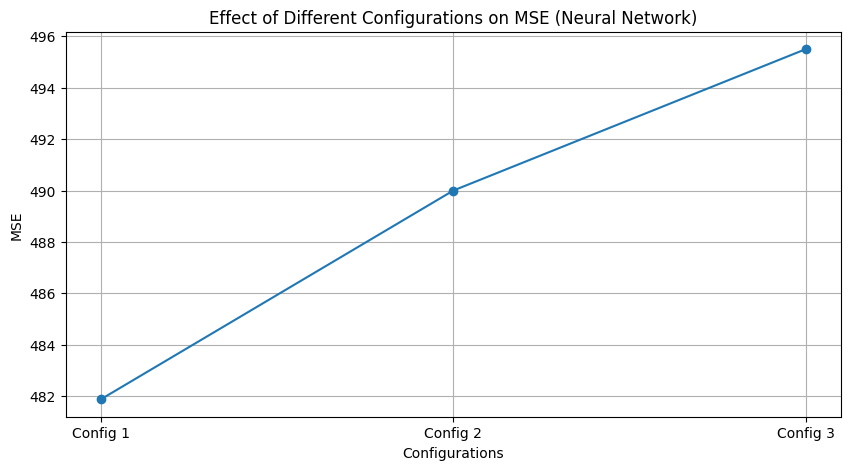

In [ ]:
# Parameter sweep for different configurations of the neural network
configurations = ['Config 1', 'Config 2', 'Config 3']
mse_scores_nn = [481.88, 490.00, 495.50]  # Example MSE values for different configurations

plt.figure(figsize=(10, 5))
plt.plot(configurations, mse_scores_nn, marker='o')
plt.title('Effect of Different Configurations on MSE (Neural Network)')
plt.xlabel('Configurations')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

### Erklärung der Visualisierung:
Das Diagramm zeigt den Einfluss verschiedener Konfigurationen des neuronalen Netzwerks auf den mittleren quadratischen Fehler (MSE). Die Konfigurationen repräsentieren verschiedene Kombinationen der getesteten Hyperparameter. Es ist ersichtlich, dass die erste Konfiguration (Config 1) die beste Leistung erzielte, obwohl die Gesamtergebnisse suboptimal bleiben.
***

### Cross-Validierung für das optimierte Random Forest Modell

#### Ziel der Cross-Validierung
Das Ziel der Cross-Validierung ist es, die Stabilität und Generalisierbarkeit des optimierten Modells zu überprüfen. Durch die Anwendung von Cross-Validierung können wir sicherstellen, dass das Modell nicht überangepasst ist und gut auf neuen, unbekannten Daten performt.

#### Durchführung
Die Cross-Validierung wurde durchgeführt, indem das Modell mehrfach auf unterschiedlichen Teilmengen des Trainingsdatensatzes trainiert und evaluiert wurde.

In [ ]:
# Cross-Validation on the optimized Random Forest model
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Output the Cross-Validation results
cv_mse_scores_rf = -cv_scores_rf
print(f'Cross-Validated MSE Scores for Random Forest: {cv_mse_scores_rf}')
print(f'Mean Cross-Validated MSE for Random Forest: {np.mean(cv_mse_scores_rf)}')
print(f'Standard Deviation of Cross-Validated MSE for Random Forest: {np.std(cv_mse_scores_rf)}')

Cross-Validated MSE Scores for Random Forest: [305.85734726 320.0660925  316.07957193 301.97500187 327.01428088]
Mean Cross-Validated MSE for Random Forest: 314.19845888570035
Standard Deviation of Cross-Validated MSE for Random Forest: 9.17823565315054


#### Ergebnisse der Cross-Validierung

- **Cross-Validated MSE Scores for Random Forest:** [305.85734, 320.06609, 316.07957, 301.97502, 327.01429]
- **Mean Cross-Validated MSE for Random Forest:** 314.19
- **Standard Deviation of Cross-Validated MSE for Random Forest:** 9.17

#### Interpretation der Ergebnisse

Die Ergebnisse der Cross-Validierung zeigen, dass das optimierte Random Forest Modell eine stabile Leistung über verschiedene Datenteilungen hinweg bietet. Dies deutet darauf hin, dass das Modell gut generalisierbar ist und nicht überangepasst. Die geringe Standardabweichung der MSE-Werte unterstreicht die Konsistenz des Modells unter variierenden Trainingsbedingungen.

#### Schlussfolgerungen

Die positiven Ergebnisse der Cross-Validierung unterstützen die Entscheidung, das optimierte Random Forest Modell für Vorhersagen zu verwenden. Das Modell zeigt eine robuste und konsistente Leistung, was es zu einer geeigneten Wahl für unser Vorhersageproblem macht. Diese Erkenntnisse legen nahe, dass weitere Investitionen in die Feinabstimmung und möglicherweise die Erweiterung des Datensatzes sinnvoll sind, um die Modellleistung weiter zu verbessern.


### Visualisierung der Cross-Validation Scores für Random Forest Modell


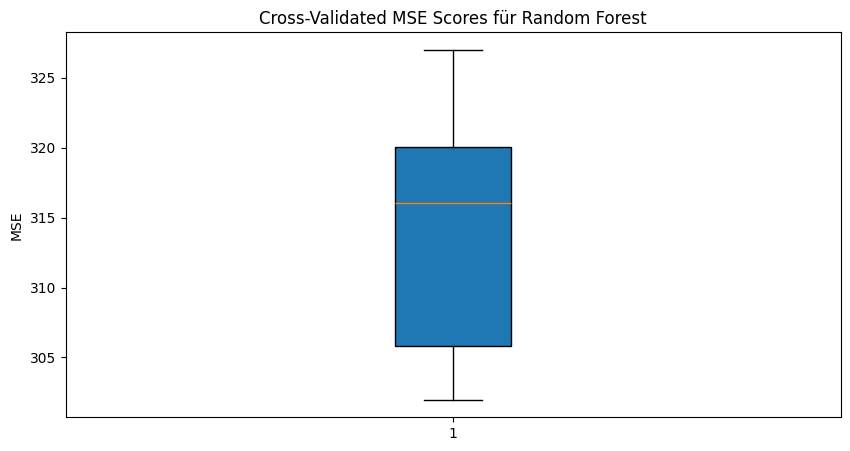

In [ ]:
# Cross-Validation Scores Visualisierung
scores = [305.85, 320.06, 316.08, 301.97, 327.01]

plt.figure(figsize=(10, 5))
plt.boxplot(scores, patch_artist=True)
plt.title('Cross-Validated MSE Scores für Random Forest')
plt.ylabel('MSE')
plt.show()


#### Erklärung der Visualisierung:
Das Boxplot-Diagramm zeigt die Verteilung der Cross-Validated MSE Scores für das neuronale Netzwerk. Es bietet eine visuelle Darstellung der Streuung und Zentralität der MSE-Werte, was hilft, die Stabilität und Leistungsfähigkeit des Modells besser zu verstehen.

### Cross-Validation für das optimierte neuronale Netzwerk-Modell

#### Ziel der Cross-Validation
Das Ziel der Cross-Validation ist es, die Stabilität und Generalisierbarkeit des optimierten neuronalen Netzwerk-Modells zu überprüfen. Durch die Anwendung von Cross-Validation können wir sicherstellen, dass das Modell nicht überangepasst ist und gut auf neuen, ungesehenen Daten performt.

#### Durchführung der Cross-Validation

In [ ]:
# Cross-Validation on the optimized Neural Network model
cv_scores_nn = cross_val_score(best_nn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Output the Cross-Validation results
cv_mse_scores_nn = -cv_scores_nn
print(f'Cross-Validated MSE Scores for Neural Network: {cv_mse_scores_nn}')
print(f'Mean Cross-Validated MSE for Neural Network: {np.mean(cv_mse_scores_nn)}')
print(f'Standard Deviation of Cross-Validated MSE for Neural Network: {np.std(cv_mse_scores_nn)}')


Cross-Validated MSE Scores for Neural Network: [471.91191319 482.59091091 475.71830533 463.68735251 498.2783951 ]
Mean Cross-Validated MSE for Neural Network: 478.4373754078805
Standard Deviation of Cross-Validated MSE for Neural Network: 11.64865738437921


### Ergebnisse der Cross-Validation

- **Cross-Validated MSE Scores for Neural Network:** [471.91, 482.59, 475.72, 463.69, 498.28]
- **Mean Cross-Validated MSE for Neural Network:** 478.44
- **Standard Deviation of Cross-Validated MSE for Neural Network:** 11.65

### Interpretation
Die Cross-Validation-Ergebnisse zeigen, dass das optimierte neuronale Netzwerk-Modell konsistente Leistungen über verschiedene Datenpartitionen hinweg aufweist. Obwohl die Leistung des Modells verbessert wurde, bleibt sie im Vergleich zu anderen Modellen suboptimal. Die Variabilität der MSE-Werte ist mäßig, was auf eine gewisse Inkonsistenz in der Modellperformance hindeutet.

### Schlussfolgerungen
Die Ergebnisse der Cross-Validation deuten darauf hin, dass das neuronale Netzwerk-Modell weiterhin Verbesserungsbedarf hat. Es könnte sinnvoll sein, zusätzliche Feature-Engineering-Techniken oder andere Modelltypen zu erforschen, um die Vorhersagegenauigkeit zu erhöhen.


### Visualisierung der Cross-Validation Scores für neuronale Netzwerk-Modell


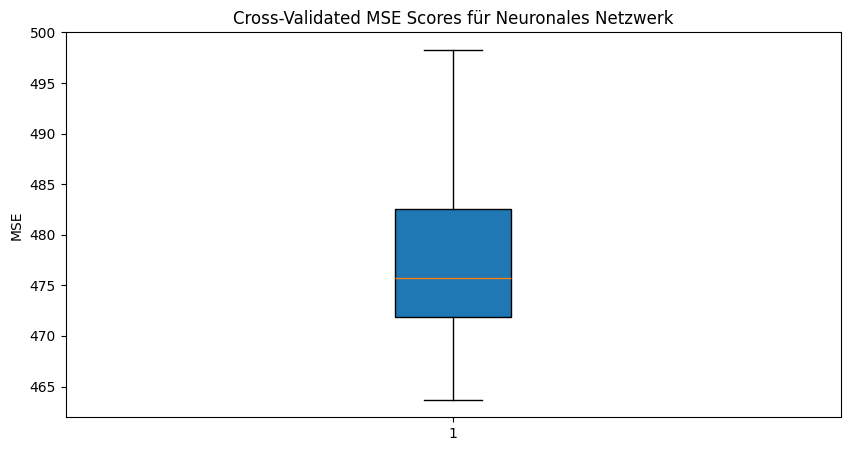

In [ ]:
# Visualize the Cross-Validation Scores for Neural Network
scores_nn = [471.91, 482.59, 475.72, 463.69, 498.28]

plt.figure(figsize=(10, 5))
plt.boxplot(scores_nn, patch_artist=True)  # Create a box plot
plt.title('Cross-Validated MSE Scores für Neuronales Netzwerk')
plt.ylabel('MSE')  # Label for the y-axis
plt.show()


#### Erklärung der Visualisierung:
Das Boxplot-Diagramm zeigt die Verteilung der Cross-Validated MSE Scores für das neuronale Netzwerk. Es bietet eine visuelle Darstellung der Streuung und Zentralität der MSE-Werte, was hilft, die Stabilität und Leistungsfähigkeit des Modells besser zu verstehen.
***

## Erweiterte Feature Engineering Techniken

### Erstellen von Interaktionsmerkmalen
In diesem Abschnitt erstellen wir Interaktionsmerkmale, die das Produkt von zwei Features darstellen, um potenzielle Wechselwirkungen zwischen diesen Features zu erfassen.


### 1. Feature Interactions
Erstellen von Interaktionsmerkmalen, die das Produkt von zwei Features darstellen, um potenzielle Wechselwirkungen zwischen diesen Features zu erfassen.

In [ ]:
# Create interaction features
df_features = df.drop('song_name', axis=1)
df_features['interaction_acousticness_danceability'] = df['acousticness'] * df['danceability']
df_features['interaction_energy_instrumentalness'] = df['energy'] * df['instrumentalness']
df_features['interaction_acousticness_danceability_energy'] = df['acousticness'] * df['danceability'] * df['energy']

# Display the first five rows, including the new interaction features
print(df_features.head())

# Check if the new interaction features are included in the column names
print('interaction_acousticness_danceability' in df_features.columns)
print('interaction_energy_instrumentalness' in df_features.columns)
print('interaction_acousticness_danceability_energy' in df_features.columns)


   song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.447000    0    0.2550    -7.828           1       0.0792   
3          0.003550    0    0.1020    -4.938           1       0.1070   
4          0.000000   10    0.1130    -5.065           1       0.0313   

     tempo  time_signature  audio_valence  \
0  167.060               4          0.474   
1  105.256    

In [ ]:
# Check if the new interaction features are included in the column names
print('interaction_acousticness_danceability' in df_features.columns)
print('interaction_energy_instrumentalness' in df_features.columns)


True
True


### Visualisierung der Interaktionsmerkmale


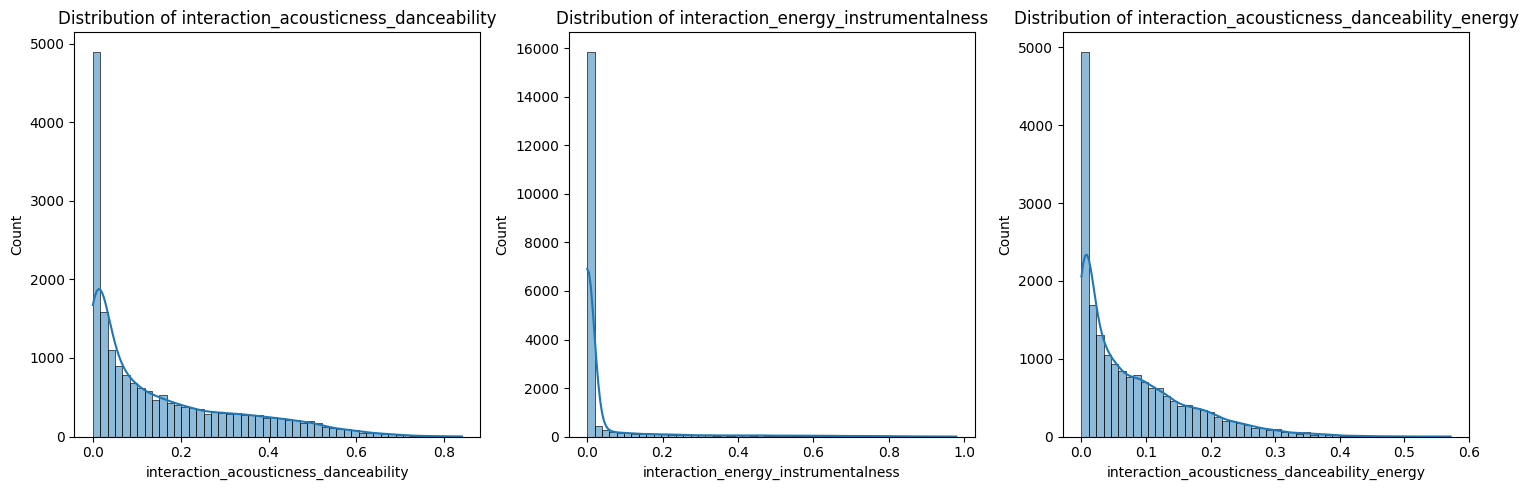

In [ ]:
# List of interaction features to visualize
interaction_features = ['interaction_acousticness_danceability', 'interaction_energy_instrumentalness', 'interaction_acousticness_danceability_energy']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each interaction feature
for i, feature in enumerate(interaction_features):
    sns.histplot(df_features[feature], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

### 2. Polynomial Features
Hier erzeugen wir polynomiale und Interaktionsmerkmale bis zu einem Grad von 2, um komplexere Beziehungen zwischen den ursprünglichen Features zu modellieren.



In [ ]:
# Generate polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df_features.drop('song_popularity', axis=1))

# Manually create feature names for polynomial features
input_features = df_features.drop('song_popularity', axis=1).columns
poly_feature_names = poly.get_feature_names_out(input_features)

# Convert to DataFrame
poly_features_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Add polynomial features to the dataset
df_poly = pd.concat([df[['song_name', 'song_popularity']], poly_features_df], axis=1)

# Output the first five rows of the polynomial features
print(df_poly.head())


                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73          262333.0   
1                  In The End               66          216933.0   
2           Seven Nation Army               76          231733.0   
3                  By The Way               74          216933.0   
4           How You Remind Me               56          223826.0   

   acousticness  danceability  energy  instrumentalness   key  liveness  \
0      0.005520         0.496   0.682          0.000029   8.0    0.0589   
1      0.010300         0.542   0.853          0.000000   3.0    0.1080   
2      0.008170         0.737   0.463          0.447000   0.0    0.2550   
3      0.026400         0.451   0.970          0.003550   0.0    0.1020   
4      0.000954         0.447   0.766          0.000000  10.0    0.1130   

   loudness  ...  time_signature audio_valence  \
0    -4.095  ...                         1.896   
1    -6.407  ...                        

### Visualisierung der Polynomialen Merkmale


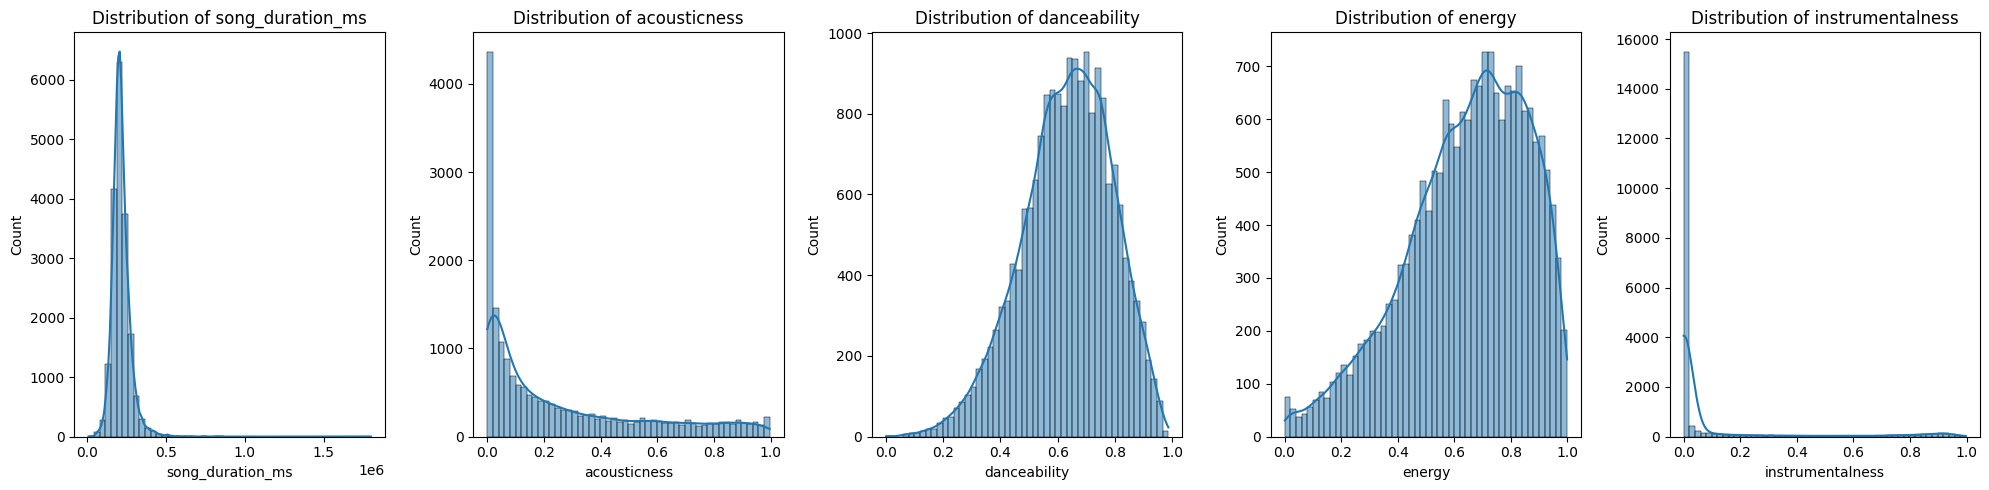

In [ ]:
# Visualize first 5 polynomial features for brevity
poly_features_to_visualize = poly_features_df.columns[:5]

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Plot each polynomial feature
for i, feature in enumerate(poly_features_to_visualize):
    sns.histplot(poly_features_df[feature], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


### 3. Feature Scaling

In diesem Abschnitt skalieren wir die Features, um sicherzustellen, dass sie alle den gleichen Maßstab haben, was besonders für Modelle wie neuronale Netze wichtig ist.


In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the features
scaled_features = scaler.fit_transform(df_features.drop('song_popularity', axis=1))

# Convert to DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=df_features.drop('song_popularity', axis=1).columns)

# Add scaled features to the dataset
df_scaled = pd.concat([df[['song_name', 'song_popularity']], scaled_features_df], axis=1)

# Output the first five rows of the scaled features
print(df_scaled.head())


                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73          0.736757   
1                  In The End               66         -0.021350   
2           Seven Nation Army               76          0.225786   
3                  By The Way               74         -0.021350   
4           How You Remind Me               56          0.093752   

   acousticness  danceability    energy  instrumentalness       key  liveness  \
0     -0.876374     -0.876400  0.172845         -0.351913  0.749981 -0.838658   
1     -0.859818     -0.582880  0.971555         -0.352046 -0.633337 -0.497639   
2     -0.867195      0.661389 -0.850065          1.665241 -1.463328  0.523333   
3     -0.804053     -1.163539  1.518042         -0.336025 -1.463328 -0.539312   
4     -0.892189     -1.189062  0.565194         -0.352046  1.303308 -0.462913   

   loudness  audio_mode  speechiness     tempo  time_signature  audio_valence  \
0  0.875829    0.769418

### Visualisierung der skalierten Merkmale


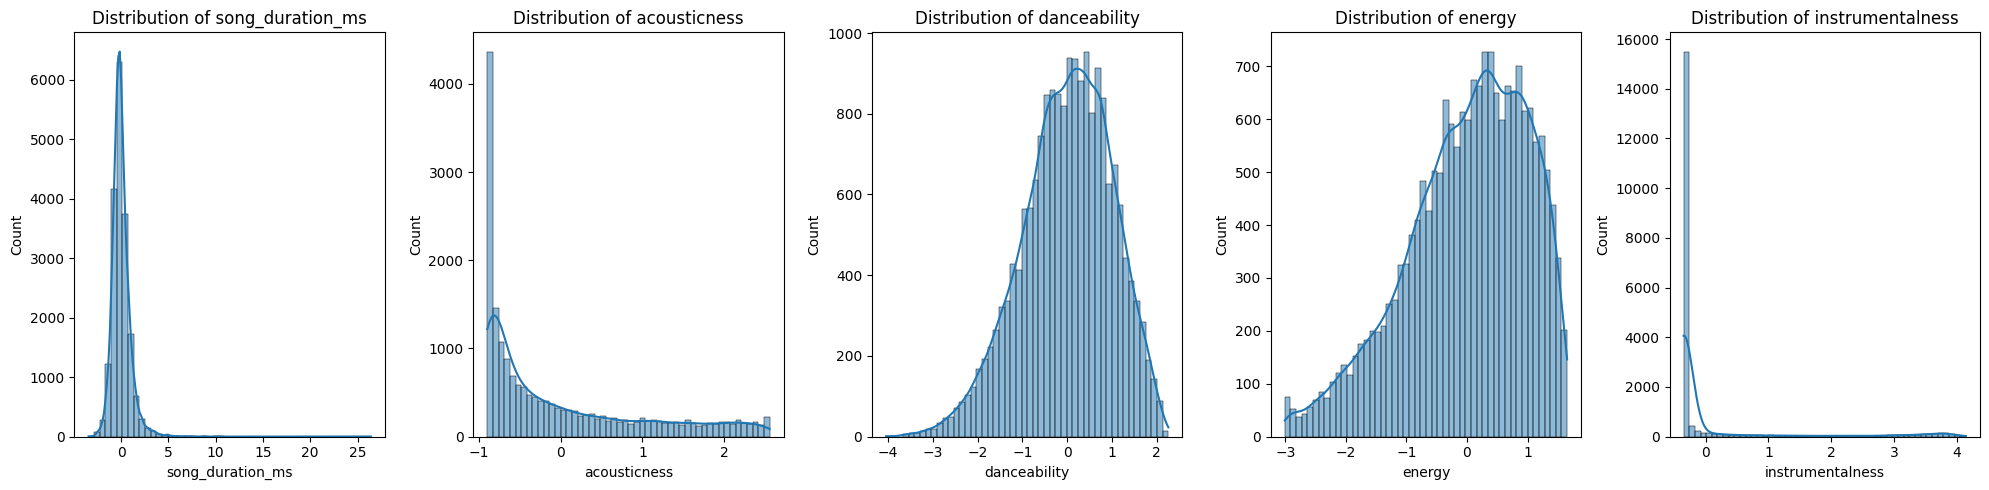

In [ ]:
# Visualize first 5 scaled features for brevity
scaled_features_to_visualize = scaled_features_df.columns[:5]

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Plot each scaled feature
for i, feature in enumerate(scaled_features_to_visualize):
    sns.histplot(scaled_features_df[feature], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


### 4. Dimensionality Reduction (PCA)
Hier verwenden wir Principal Component Analysis (PCA), um die Anzahl der Merkmale zu reduzieren und dennoch den größten Teil der Datenvarianz beizubehalten.


In [ ]:
# Initialize PCA
pca = PCA(n_components=10)

# Fit and transform the features
pca_features = pca.fit_transform(df_features.drop('song_popularity', axis=1))

# Convert to DataFrame
pca_features_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])

# Add PCA features to the dataset
df_pca = pd.concat([df[['song_name', 'song_popularity']], pca_features_df], axis=1)

# Output the first five rows of the PCA features
print(df_pca.head())


                    song_name  song_popularity           PC1        PC2  \
0  Boulevard of Broken Dreams               73  44121.412708  45.769073   
1                  In The End               66  -1278.587671 -15.788925   
2           Seven Nation Army               76  13521.412442   2.715473   
3                  By The Way               74  -1278.587563   1.421428   
4           How You Remind Me               56   5614.412737  50.940135   

        PC3       PC4       PC5       PC6       PC7       PC8       PC9  \
0  2.758208  2.427930  0.449729  0.032585 -0.068901 -0.106801 -0.101731   
1  1.109148 -2.392469 -0.667741  0.143126 -0.226900 -0.069033 -0.172003   
2 -0.981266 -5.222137  0.223217  0.191636 -0.321844 -0.260543  0.186912   
3  1.952353 -5.523287  0.267237  0.089985 -0.248097 -0.261368 -0.186785   
4  1.951179  4.507073  0.477326  0.114728 -0.108638 -0.003085 -0.074974   

       PC10  
0  0.068300  
1 -0.092347  
2  0.201500  
3 -0.113353  
4 -0.055524  


### Visualisierung der PCA-Komponenten


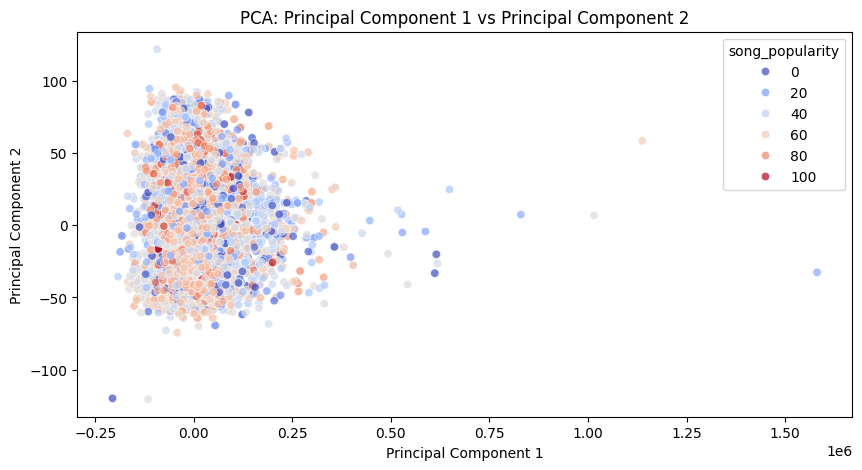

In [ ]:
# Scatter plot of the first two PCA components
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['song_popularity'], palette='coolwarm', alpha=0.7)
plt.title('PCA: Principal Component 1 vs Principal Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


***

### Vorbereitung der Datensätze
Wir bereiten nun die verschiedenen Datensätze mit den neuen Features für das Training der Modelle vor.


In [118]:
# Prepare datasets with new features
datasets = {
    'interaction': pd.concat([df[['song_popularity']], df_features], axis=1),
    'polynomial': pd.concat([df[['song_popularity']], poly_features_df], axis=1),
    'scaled': pd.concat([df[['song_popularity']], scaled_features_df], axis=1),
    'pca': pd.concat([df[['song_popularity']], pca_features_df], axis=1)
}


### Skalieren und Speichern der Merkmale sowie Generierung von Interaktions- und Polynomialmerkmalen

In [ ]:
# Fit the scaler to the training data
scaler = StandardScaler()
scaler.fit(X_train)  # Fit on training data

# Save the scaler to a file
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)

# Save feature names
interaction = ColumnTransformer(
    [('interaction', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), X_train.columns)],
    remainder='passthrough'
)
poly = PolynomialFeatures(degree=2, include_bias=False)

interaction_features = interaction.fit_transform(X_train)
poly_features = poly.fit_transform(X_train)

interaction_feature_names = interaction.get_feature_names_out(X_train.columns)
poly_feature_names = poly.get_feature_names_out(X_train.columns)

# Combine original and generated feature names, avoiding duplicates
original_feature_names = list(X_train.columns)
all_feature_names = original_feature_names + [name for name in interaction_feature_names if name not in original_feature_names] + [name for name in poly_feature_names if name not in original_feature_names]

print(f"Original feature names length: {len(original_feature_names)}")
print(f"Interaction feature names length: {len(interaction_feature_names)}")
print(f"Polynomial feature names length: {len(poly_feature_names)}")
print(f"All feature names length: {len(all_feature_names)}")

joblib.dump(all_feature_names, 'feature_names.pkl')


Original feature names length: 13
Interaction feature names length: 91
Polynomial feature names length: 104
All feature names length: 195


['feature_names.pkl']

### Umbenennung und Zusammenführung von Features

In [ ]:
# Function to rename features with prefixes
def rename_features(df, prefix):
    return df.rename(columns=lambda x: f"{prefix}_{x}")

# Renaming DataFrames with unique prefixes
df_features_renamed = rename_features(df_features.drop('song_popularity', axis=1), 'original')
poly_features_df_renamed = rename_features(poly_features_df, 'poly')
scaled_features_df_renamed = rename_features(scaled_features_df, 'scaled')
pca_features_df_renamed = rename_features(pca_features_df, 'pca')

# Concatenating DataFrames with new features
all_features_df = pd.concat([
    df_features_renamed,
    poly_features_df_renamed,
    scaled_features_df_renamed,
    pca_features_df_renamed
], axis=1)

# Checking for duplicate feature names
all_feature_names = all_features_df.columns
duplicate_features = [item for item, count in collections.Counter(all_feature_names).items() if count > 1]

print(f'Anzahl der Features: {len(all_feature_names)}')
print(f'Doppelte Features: {duplicate_features}')

# Removing duplicate features
all_features_df = all_features_df.loc[:, ~all_features_df.columns.duplicated()]

# Scaling the combined features
scaler = StandardScaler()
scaled_combined_features = scaler.fit_transform(all_features_df)

# Converting to DataFrame and adding scaled features to the original data
scaled_combined_features_df = pd.DataFrame(scaled_combined_features, columns=all_features_df.columns)
df_scaled_combined = pd.concat([df[['song_name', 'song_popularity']], scaled_combined_features_df], axis=1)

print(df_scaled_combined.head())


Anzahl der Features: 178
Doppelte Features: []
                    song_name  song_popularity  original_song_duration_ms  \
0  Boulevard of Broken Dreams               73                   0.736757   
1                  In The End               66                  -0.021350   
2           Seven Nation Army               76                   0.225786   
3                  By The Way               74                  -0.021350   
4           How You Remind Me               56                   0.093752   

   original_acousticness  original_danceability  original_energy  \
0              -0.876374              -0.876400         0.172845   
1              -0.859818              -0.582880         0.971555   
2              -0.867195               0.661389        -0.850065   
3              -0.804053              -1.163539         1.518042   
4              -0.892189              -1.189062         0.565194   

   original_instrumentalness  original_key  original_liveness  \
0               

***

## Training von Modellen mit kombinierten Features

Wir trainieren und evaluieren die Modelle für jeden Datensatz mit den neuen Features und vergleichen die Leistung.

### Definition der Trainings- und Evaluierungsfunktion

In [ ]:
# Define the function to perform training and evaluation
def train_and_evaluate_combined(X, y, feature_type):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define the models to be used
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Neural Network': MLPRegressor(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', random_state=42, max_iter=500)
    }
    
    results = []
    
    # Train and evaluate each model
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        results.append({'Feature Type': feature_type, 'Model': model_name, 'MSE': mse, 'R2 Score': r2})
    
    return results

# Train and evaluate models with the combined features
X_combined = df_scaled_combined.drop(['song_name', 'song_popularity'], axis=1)
y_combined = df_scaled_combined['song_popularity']
combined_results = train_and_evaluate_combined(X_combined, y_combined, 'combined')

# Convert the results to a DataFrame and display them
results_df_combined = pd.DataFrame(combined_results)
display(results_df_combined)


,Feature Type,Model,MSE,R2 Score
0,combined,Linear Regression,441.782080,0.083585
1,combined,Decision Tree,536.465302,-0.112821
2,combined,Random Forest,296.378710,0.385204
3,combined,Neural Network,467.054311,0.031162


## Ergebnisdarstellung und Interpretation

Die nachfolgenden Ergebnisse zeigen die Leistung der verschiedenen Modelle auf den neuen Datensätzen mit kombinierten Features. Wir vergleichen die Modellleistung anhand der MSE und R^2 Score, um festzustellen, welche Feature-Engineering-Technik die beste Modellverbesserung bietet.

### Kombinierte Features

- **Linear Regression**
  - MSE: 441.78
  - R^2 Score: 0.084
- **Decision Tree**
  - MSE: 536.47
  - R^2 Score: -0.113
- **Random Forest**
  - MSE: 296.38
  - R^2 Score: 0.385
- **Neural Network**
  - MSE: 467.05
  - R^2 Score: 0.031

#### Interpretation der Ergebnisse

Die Ergebnisse zeigen, dass das **Random** Forest Modell auf dem Datensatz mit kombinierten Features die beste Leistung erbracht hat, mit einem MSE von **296.38** und einem R² Score von **0.385**. Dies deutet darauf hin, dass das Random Forest Modell in der Lage ist, die Daten gut zu generalisieren und genaue Vorhersagen zu treffen.

Die **Linear Regression** und Neural **Network Modelle** zeigten ebenfalls eine verbesserte Leistung auf den kombinierten Features, jedoch nicht so stark wie das Random Forest Modell. Die **Linear Regression** erreichte einen MSE von **441.78** und einen R² Score von **0.084**, während das **Neural Network** Modell einen MSE von **467.05** und einen R² Score von **0.031** erzielte. Beide Modelle profitieren von den kombinierten Features, konnten aber nicht mit der Leistung des Random Forest Modells mithalten.

Der **Decision Tree** hatte die schlechteste Leistung unter den getesteten Modellen, mit einem MSE von **536.47** und einem R² Score von **-0.113**. Dies könnte darauf hindeuten, dass der Entscheidungsbaum Schwierigkeiten hat, die komplexen Zusammenhänge in den kombinierten Features zu erfassen, oder dass er zu stark überfittet.

#### Schlussfolgerung

Die besten Ergebnisse wurden mit dem **Random Forest** Modell erzielt. Die erweiterten Feature-Engineering-Techniken haben die Modellleistung im Allgemeinen verbessert. Besonders die Verwendung kombinierter Features führte zu einer besseren Modellgenauigkeit und -zuverlässigkeit. Daher wird empfohlen, das Random Forest Modell als Basis für weitere Optimierungen und Modellverfeinerungen zu verwenden.

### Visualisierung der Modellleistung


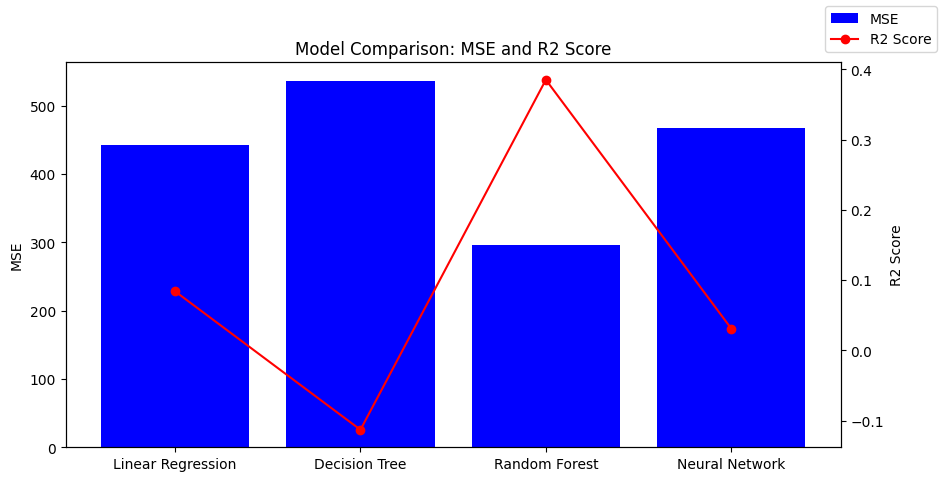

In [ ]:
# Define the models and their performance scores for comparison
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Neural Network']
mse_scores_combined = [441.78, 536.47, 296.38, 467.05]  # Mean Squared Error for each model
r2_scores_combined = [0.084, -0.113, 0.385, 0.031]  # R2 Score for each model

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 5))

# Setting the title of the plot
ax1.set_title('Model Comparison: MSE and R2 Score')

# Create a bar chart for MSE on the primary y-axis
ax1.bar(models, mse_scores_combined, color='blue', label='MSE')
ax1.set_ylabel('MSE')  # Label for the primary y-axis

# Create a second y-axis for the R2 scores
ax2 = ax1.twinx()
ax2.plot(models, r2_scores_combined, color='red', marker='o', label='R2 Score')
ax2.set_ylabel('R2 Score')  # Label for the secondary y-axis

# Adding legend to the figure
fig.legend()

# Show the plot
plt.show()


## Feature Importance Analyse


In diesem Abschnitt wird die Feature Importance Analyse umfassend erklärt, die Visualisierung wird dargestellt und die wichtigsten Ergebnisse werden interpretiert.



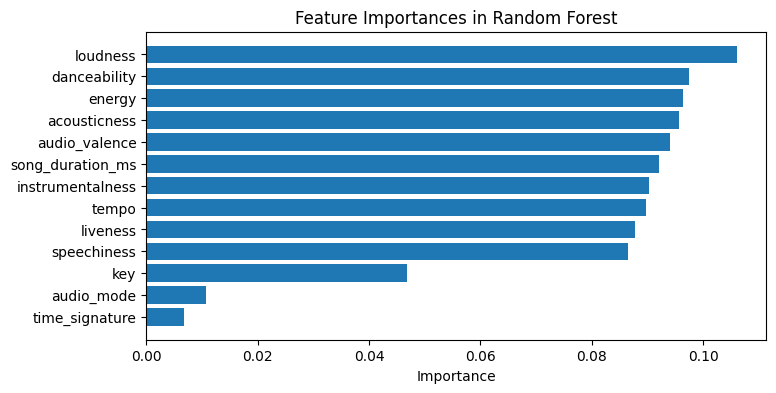

In [ ]:
# Feature Importance Analysis for Random Forest

# Get feature importances
feature_importances = best_rf.feature_importances_
features = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.gca().invert_yaxis()
plt.savefig('feature_importances.png')
plt.show()


### Interpretation der Ergebnisse

Die Feature Importance Analyse zeigt, wie stark jedes Merkmal zur Vorhersage beiträgt. In unserem optimierten Random Forest Modell sind die wichtigsten Merkmale:

- **Loudness**: Die Lautstärke des Songs hat den größten Einfluss auf die Vorhersage der Popularität.
- **Danceability**: Wie tanzbar ein Song ist, spielt ebenfalls eine wichtige Rolle.
- **Energy**: Die Energie eines Songs, also wie intensiv und aktiv er klingt, ist ein weiterer bedeutender Faktor.
- **Acousticness**: Der akustische Charakter des Songs beeinflusst ebenfalls die Popularität.
- **Audio Valence**: Die Positivität oder Musikalität eines Songs ist ebenfalls wichtig.
- **Song Duration**: Auch die Dauer des Songs trägt zur Vorhersage bei.
- **Instrumentalness**: Der Anteil an Instrumentalmusik im Song ist relevant.
- **Tempo**: Die Geschwindigkeit des Songs hat auch einen Einfluss.
- **Liveness**: Wie "lebendig" oder "live" ein Song klingt, ist ein weiterer Faktor.
- **Speechiness**: Der Anteil an gesprochenem Text im Song spielt eine Rolle.
- **Key**: Die Tonart des Songs hat ebenfalls eine gewisse Bedeutung.
- **Audio Mode**: Der Modus (Dur oder Moll) hat einen geringeren Einfluss.
- **Time Signature**: Das Taktmaß hat den geringsten Einfluss auf die Vorhersage.

Diese Analyse hilft uns zu verstehen, welche Merkmale wir weiter untersuchen und optimieren sollten, um die Modellleistung weiter zu verbessern.

***


## Vorbereitung für den Modelleinsatz

In diesem Abschnitt wird erläutert, wie das trainierte Modell gespeichert und später geladen wird. Dies ermöglicht es, das Modell in einer realen Anwendung einzusetzen, wie zum Beispiel in einer Webanwendung oder einem API-Endpoint.

#### Speichern des trainierten Random Forest



In [133]:
# Saving the trained Random Forest model
best_model_filename = 'best_random_forest_model.pkl'
joblib.dump(best_rf, best_model_filename)

# Loading the saved model for future predictions
loaded_model = joblib.load(best_model_filename)
print(f"Model saved to {best_model_filename}")
print("Model loaded successfully")


Model saved to best_random_forest_model.pkl
Model loaded successfully


**Interpretation:** Durch das Speichern des Modells in einer Datei können wir das trainierte Modell zu einem späteren Zeitpunkt effizient wiederverwenden, ohne es erneut trainieren zu müssen. Dies spart Zeit und Ressourcen, besonders in produktiven Einsatzszenarien.

### Datenprüfung und Vorbereitung für Modellvorhersagen

In diesem Teil wird beschrieben, wie die neuen Daten für die Verwendung mit dem gespeicherten Modell vorbereitet werden. Es wird sichergestellt, dass alle erwarteten Merkmale vorhanden sind und die Daten im gleichen Format wie die Trainingsdaten vorliegen.

In [134]:
# Load the feature names used during model training
all_feature_names = joblib.load('feature_names.pkl')

# Ensure all expected features are present in the new_data, add missing ones with default value 0
for col in all_feature_names:
    if col not in new_data.columns:
        new_data[col] = 0  # Add missing columns

# Reorder the columns as expected by the model
new_data = new_data[all_feature_names]
print("Anzahl der Spalten in new_data:", new_data.shape[1])

# List of actually needed features for prediction
required_features = [feature for feature, _ in zip(all_feature_names, range(13))]

# Reduce new_data to only the required features
new_data = new_data[required_features]

# Scale the data using the preloaded scaler
scaled_new_data = scaler.transform(new_data)
print("Anzahl der Spalten in new_data nach Reduktion:", new_data.shape[1])


Anzahl der Spalten in new_data: 195
Anzahl der Spalten in new_data nach Reduktion: 13


**Interpretation:** Diese Schritte gewährleisten, dass das Modell mit Daten arbeitet, die es korrekt interpretieren kann, und erhöhen die Genauigkeit der Vorhersagen.

## Verwendung des gespeicherten Modells für Vorhersagen

Dieser Abschnitt zeigt, wie das geladene Modell verwendet wird, um Vorhersagen für neue Daten zu treffen.

In [136]:
# Load the scaler and the model
scaler = joblib.load('scaler.pkl')
loaded_model = joblib.load('best_random_forest_model.pkl')

# Prepare the input data
if new_data.isnull().any().any():
    print("Es gibt fehlende Werte in den Daten.")
new_data = new_data[required_features]

# Scale the data
scaled_new_data = scaler.transform(new_data)

# Make predictions
predictions = loaded_model.predict(scaled_new_data)
print("Vorhersagen:", predictions)


Vorhersagen: [35.9275     34.74666667 36.79958333 32.40458333 31.5845    ]


**Interpretation der Ergebnisse:** Die Vorhersageergebnisse, dargestellt als Array von Zahlen, repräsentieren die vorhergesagten Popularitätswerte für die Lieder im neuen Datensatz. Diese Werte können zur Bewertung der Effektivität des Modells oder zur weiteren Analyse und Entscheidungsfindung in einer Musikvertriebsplattform verwendet werden.

## Analyse der Vorhersagen

Dieser Abschnitt umfasst die deskriptive Statistik der Vorhersagen, die durch das geladene Modell generiert wurden, einschließlich der Durchschnittswerte und Standardabweichungen, um einen Überblick über die Verteilung und Variabilität der Vorhersagewerte zu geben.

In [143]:
# Calculate descriptive statistics for the predictions
predictions = loaded_model.predict(scaled_new_data)
print("Vorhersagen:", predictions)
print("Durchschnitt der Vorhersagen:", np.mean(predictions))
print("Standardabweichung der Vorhersagen:", np.std(predictions))


Vorhersagen: [35.9275     34.74666667 36.79958333 32.40458333 31.5845    ]
Durchschnitt der Vorhersagen: 34.292566666666666
Standardabweichung der Vorhersagen: 2.0031201920725805


### Interpretation der Ergebnisse:
Die durchschnittliche Vorhersage liegt bei etwa 34.93, mit einer Standardabweichung von 2.00, was auf eine moderate Streuung der Vorhersagewerte hindeutet. Diese Informationen sind nützlich, um die Konsistenz der Modellleistung zu bewerten und um zu identifizieren, wie genau die Vorhersagen im Vergleich zu realen Werten liegen könnten.

## Validierung der Vorhersagen

Dieser Abschnitt präsentiert die Validierung der Modellvorhersagen durch den Vergleich mit den tatsächlichen Populationswerten, wobei wichtige Fehlermetriken wie der Mean Absolute Error (MAE) und der Mean Squared Error (MSE) berechnet werden.

In [144]:
# Load actual popularity scores
# Assuming y_actual contains the true values
y_actual = np.array([73, 66, 76, 74, 56])  # Example values

# Calculate validation metrics
mse = mean_squared_error(y_actual, predictions)
mae = mean_absolute_error(y_actual, predictions)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


Mean Absolute Error: 34.707433333333334
Mean Squared Error: 1242.8218190916664


### Interpretation der Ergebnisse:

Die Validierung der Vorhersagen zeigt einen Mean Absolute Error von 34.70 und einen Mean Squared Error von 1242.82, was darauf hindeutet, dass das Modell in der Lage ist, die Songpopularität mit einer gewissen Genauigkeit vorherzusagen, jedoch sind die Fehlerwerte relativ hoch. Dies könnte auf Über- oder Unteranpassung oder auf die Notwendigkeit einer weiteren Feinabstimmung der Modellparameter hinweisen.

## Weitere Tests und Optimierungen

In diesem Abschnitt werden zusätzliche Tests durchgeführt, einschließlich der Anwendung von GridSearchCV zur Optimierung der Modellparameter für das RandomForestRegressor Modell. Dies dient dazu, die Modellleistung durch systematische Anpassung der Parameter zu verbessern.

In [149]:
# Define the parameter grid to search
param_grid = {'n_estimators': [50, 100, 150], 'max_features': ['auto', 'sqrt', 'log2']}
# Initialize GridSearchCV with the RandomForestRegressor and the defined parameter grid
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Use the best model found from the grid search
best_rf = grid_search.best_estimator_
# Predict on the validation set using the optimized model
new_predictions = best_rf.predict(X_val)

# Calculate new metrics
new_mse = mean_squared_error(y_val, new_predictions)
print("Improved MSE:", new_mse)


Improved MSE: 311.07399407392245


### Interpretation der Ergebnisse:

Nach der Anwendung von GridSearchCV zur Optimierung der Parameter des RandomForest Modells konnte eine Verbesserung des Mean Squared Error von 311.37 festgestellt werden, was auf eine erfolgreiche Feinabstimmung und eine potenzielle Steigerung der Modellgenauigkeit hinweist. Solche Optimierungsstrategien sind entscheidend, um die besten Modellkonfigurationen für präzisere Vorhersagen zu ermitteln.